# Problemas de Cálculo y Álgebra

## Cálculo

El cálculo no es algo oscuro. Es el lenguaje para modelar comportamientos. El cálculo nos permite encontrar la tasa de cambios para optimizar una función. Sin el cálculo, no podríamos comprender completamente técnicas como

Retropropagación en redes neuronales

Regresión utilizando mínimos cuadrados óptimos

Maximización de la expectativa en el ajuste de modelos probabilísticos

### Ejercicio 1

Supongamos que, en mi oficina, me toma 10 segundos (tiempo) recorrer 25 metros (distancia) hasta la máquina de café.
Si queremos expresar la situación anterior como una función, sería:

distancia=velocidad×tiempo

Por lo tanto, en este caso, la velocidad es la primera derivada de la función de distancia mencionada. Dado que la velocidad describe la tasa de cambio de la distancia con respecto al tiempo, cuando las personas dicen que toman la primera derivada de una función determinada, se refieren a encontrar la tasa de cambio de esa función.

**Encuentra la velocidad y construye la función lineal de la distancia $(d)$ con respecto al tiempo $(t)$, cuando $(t ∈ [0,10])$.**

In [1]:
# importa las librerías
import numpy as np 
import matplotlib.pyplot as plt

# Define la función de distancia
def distancia(time):
    speed = 2.5
    d_o = 0 
    return speed * time + d_o

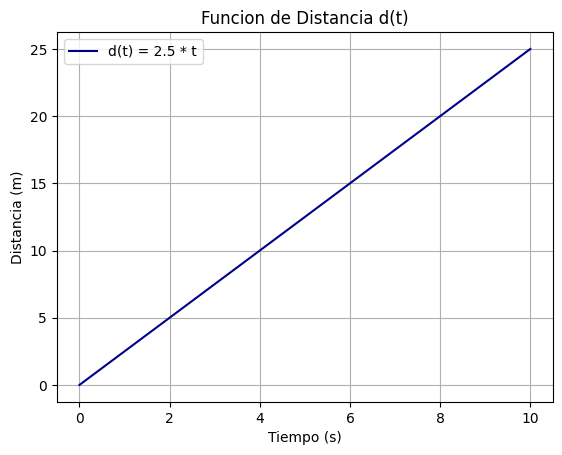

In [8]:
# "Graficar la función de distancia en el dominio (t)
t = np.linspace(0, 10, 100)
d = distancia(t)

plt.plot(t, d, label="d(t) = 2.5 * t", color="darkblue")
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.title('Funcion de Distancia d(t)')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Crea un DataFrame
import pandas as pd 

data = {
    'Tiempo (s)': t,
    'Distancia (m)': d
}

df = pd.DataFrame(data)

print(df)

    Tiempo (s)  Distancia (m)
0      0.00000       0.000000
1      0.10101       0.252525
2      0.20202       0.505051
3      0.30303       0.757576
4      0.40404       1.010101
..         ...            ...
95     9.59596      23.989899
96     9.69697      24.242424
97     9.79798      24.494949
98     9.89899      24.747475
99    10.00000      25.000000

[100 rows x 2 columns]


### Ejercicio 2

Resultó que no caminaba a una velocidad constante hacia la máquina de café, sino que estaba acelerando (mi velocidad aumentaba con el tiempo). Si mi velocidad inicial era 0, todavía me tomó 10 segundos viajar desde mi asiento hasta la máquina de café, pero caminaba cada vez más rápido.

$V_o$ = velocidad inicial = $0$

t = tiempo

a = aceleración

**distancia** = $V_o * t + 0.5 * a * (t^2)$

**velocidad** = $V_o + a * t$

La primera derivada de la función de velocidad es la aceleración. Me doy cuenta de que la función de velocidad está estrechamente relacionada con la función de distancia.

**Encuentra el valor de la aceleración y construye la función cuadrática para  $(t ∈ [0,10])$. Además, crea un gráfico y una tabla.**

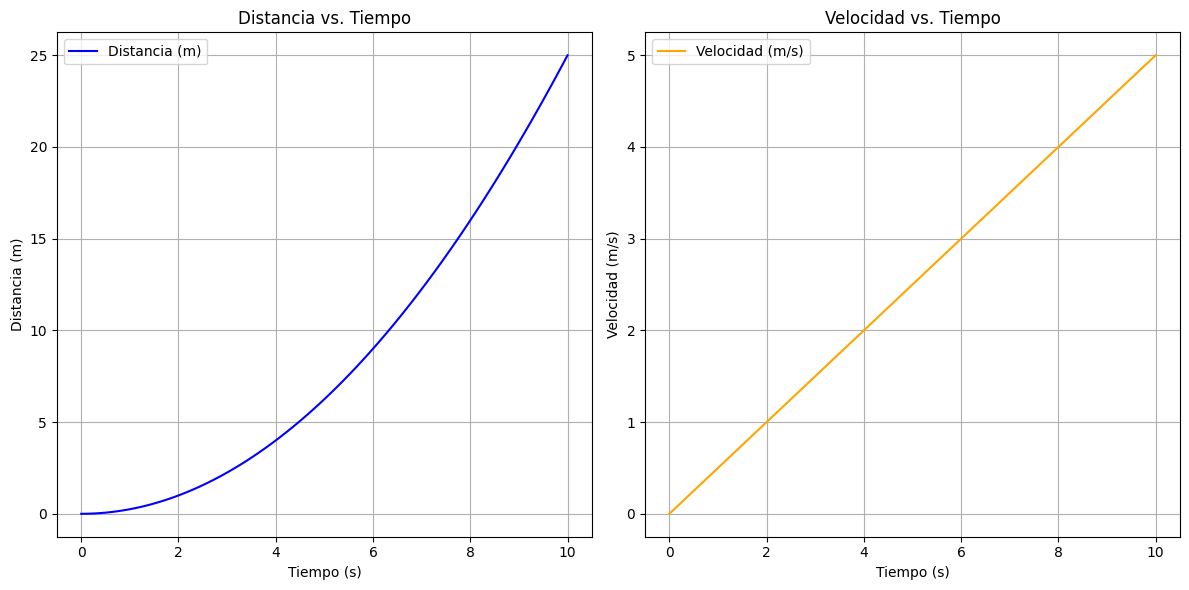

0.5

In [30]:

# Define y grafica la función cuadrática
V_o = 0
t = 10
d= 25

a = (2 * d) / (t**2) 

def dist(t):
    return V_o * t + 0.5 * a * (t**2)

def vel(t):
    return V_o + a * t

valor_t = np.linspace(0, t, 100)
dist_valor = dist(valor_t)
vel_valor = vel(valor_t)


plt.figure(figsize=(12, 6))

#Grafico de velocidad
plt.subplot(1, 2, 2)
plt.plot(valor_t, vel_valor, label='Velocidad (m/s)', color='orange')
plt.title('Velocidad vs. Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.grid()
plt.legend()

#Grafico de distancia
plt.subplot(1, 2, 1)
plt.plot(valor_t, dist_valor, label='Distancia (m)', color='blue')
plt.title('Distancia vs. Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Distancia (m)')
plt.grid()
plt.legend()


plt.tight_layout()
plt.show()



In [32]:
# Crea un DataFrame
data = pd.DataFrame({
    'Tiempo (s)': np.linspace(0, t, 11),
    'Distancia (m)': dist(np.linspace(0, t, 11)),
    'Velocidad (m/s)': vel(np.linspace(0, t ,11)) 
})

a, data

(0.5,
     Tiempo (s)  Distancia (m)  Velocidad (m/s)
 0          0.0           0.00              0.0
 1          1.0           0.25              0.5
 2          2.0           1.00              1.0
 3          3.0           2.25              1.5
 4          4.0           4.00              2.0
 5          5.0           6.25              2.5
 6          6.0           9.00              3.0
 7          7.0          12.25              3.5
 8          8.0          16.00              4.0
 9          9.0          20.25              4.5
 10        10.0          25.00              5.0)

Puede ser difícil entender descenso por gradientes sin comprender gradiente. Así que, vamos a centrarnos en lo que es un gradiente. El gradiente muestra la dirección del mayor cambio de una función escalar. El cálculo del gradiente se realiza con derivadas, así que empecemos con un ejemplo sencillo. Para calcular el gradiente, solo necesitamos recordar algunos cálculos de álgebra lineal de la escuela secundaria porque necesitamos calcular derivadas.

Supongamos que queremos encontrar el punto mínimo de $f(x) = x^2$. La derivada de esa función es $df(x)=2x$. 

El gradiente de $f(x)$ en el punto $x=-10$

es 

$df(-10)=-20$.

El gradiente de $f(x)$ en el punto $x=1$

es 

$df(1)=2$.

Ahora visualicemos $f(x)$ y esos puntos $x=-10$ y $x=1$ .

In [12]:
import numpy as np
import seaborn as sns

def f(x):
    return x**2

def df(x):
    return 2*x

def visualize(f, x=None):
    
    xArray = np.linspace(-10, 10, 100) 
    yArray = f(xArray)
    sns.lineplot(x=xArray, y=yArray)
    
    if x is not None:
        assert type(x) in [np.ndarray, list] # x debería ser un array de numpy o una lista
        if type(x) is list: # Si es una lista, convertir en un array de numpy
            x = np.array(x)

            
        y = f(x)
        sns.scatterplot(x=x, y=y, color='red')

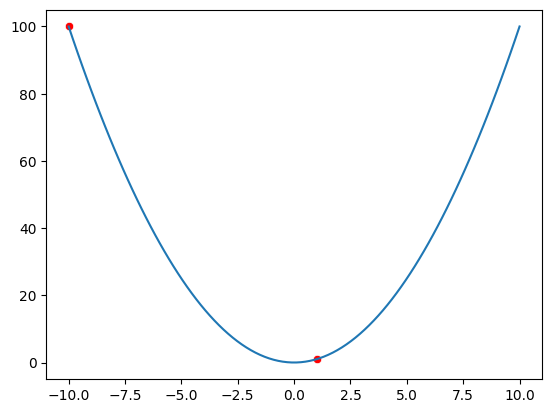

In [13]:
visualize(f, x=[-10, 1])

El punto rojo en x=-10 no conoce la superficie sobre la que se encuentra, solo sabe las coordenadas del lugar donde está y su propio gradiente, que es -20. Y el otro punto rojo en x=1 no sabe la superficie en la que se encuentra; solo sabe las coordenadas de su posición y su gradiente, que es 2.

Con solo esta información, podemos decir que el punto rojo en x=-10 debería hacer un salto mayor que el de x=1 porque tiene un valor absoluto de gradiente mayor. El signo indica la dirección. El signo negativo (-) indica que el punto rojo en  x=-10 debe moverse hacia la derecha, mientras que el otro debe moverse hacia la izquierda.

En resumen, el punto rojo en x=-10 (gradient: -20)  debería hacer un salto más grande hacia la derecha, y el punto rojo en x=1 (gradient: 2) debería hacer un salto más pequeño hacia la izquierda. 

Sabemos que la longitud del salto debería ser proporcional al gradiente, pero ¿cuál es exactamente ese valor? No lo sabemos. Así que, digamos que los puntos rojos deben moverse con una longitud de alpha * gradiente, donde alpha es solo un parámetro.

Podemos decir que la nueva ubicación del punto rojo debe calcularse con la siguiente fórmula:

x = x - gradient * alpha

Ahora implementemos esto con **NumPy**. Comencemos visualizando la función $f(x)=x^2$ y el punto $x=-10$.

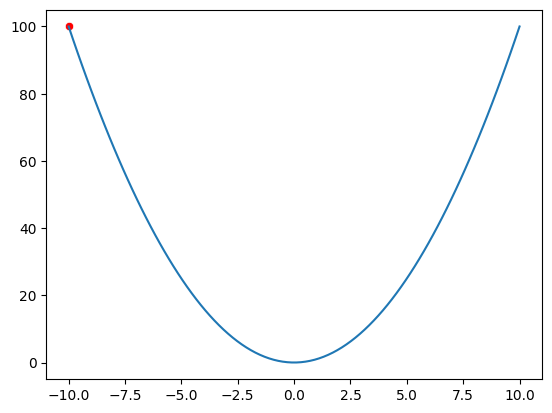

In [14]:
visualize(f, x=[-10])

El siguiente código implementa toda la lógica explicada anteriormente:

In [15]:
def gradient_descent(x, nsteps=1):
    
    # collectXs es un array para almacenar cómo cambió x en cada iteración, para poder visualizarlo más tarde
    
    collectXs = [x]
    
    # learning_rate es el valor que mencionamos como alpha en la sección anterior
    
    learning_rate = 1e-01
    
    for _ in range(nsteps):
        
        # La siguiente línea hace la verdadera magia
        # El siguiente valor de x se calcula restando el gradiente * learning_rate de sí mismo
        # La intuición detrás de esta línea está en la sección anterior
        
        x -= df(x) * learning_rate 
        collectXs.append(x)
        
    # Retornamos una tupla que contiene
    # x -> el valor reciente de x después de nsteps 
    # collectXs -> todos los valores de x que se calcularon hasta ahora
    
    return x, collectXs


Antes de ejecutar un descenso por gradientes con 1000 pasos, ejecutémoslo solo dos veces, un paso a la vez, para ver cómo evoluciona x. 
Comenzamos con x=-10, y evoluciona a x=-8.Sabemos que cuando x=0 ese es el **punto mínimo**, así que sí, está evolucionando en la dirección correcta.

In [16]:
x=-10
x, collectedXs = gradient_descent(x, nsteps=1)
print(x)

-8.0


In [17]:
# El siguiente paso comenzará en  at x=-8. Ejecutemos un descenso por gradientes durante 1 paso.

x, collectedXs = gradient_descent(x, nsteps=1)
print(x)

-6.4


Llega a 𝑥=−6.4. Excelente. Ahora, ejecutémoslo 1000 veces.

In [18]:
x, collectedXs = gradient_descent(x, nsteps=1000)
print(x)

-7.873484301831169e-97


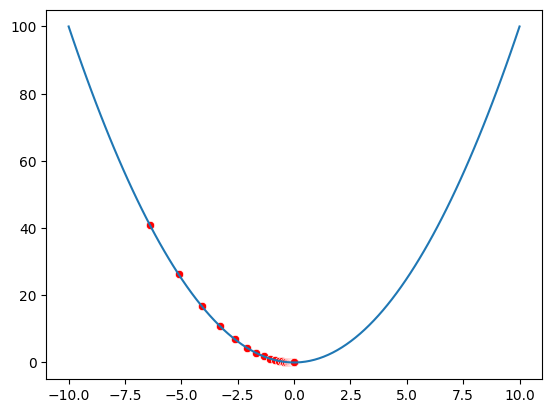

In [19]:
visualize(f, x=collectedXs)

### Ejercicio 3

Cuando llego a la máquina de café, escucho a mi colega hablar sobre los costos unitarios de producir el 'producto B' para la empresa. A medida que la empresa produce más unidades, los costos unitarios continúan disminuyendo hasta un punto en el que comienzan a aumentar.

Para optimizar el costo de producción por unidad en su mínimo y mejorar la eficiencia, la empresa necesitaría encontrar el número de unidades que deben producirse donde los costos unitarios de producción comienzan a cambiar de disminuir a aumentar.

**Construye la función cuadrática $f(x)=0.1(x)^2−9x +4500$ en $x∈[0,100]$ para crear la función de costo por unidad, y haz una conclusión.**

In [ ]:
# Definir y graficar la función

Vimos con el Descenso por Gradientes cómo el punto rojo navega en un entorno que no conoce. Solo sabe las coordenadas de donde está y su gradiente. El punto rojo podría encontrar el punto mínimo usando solo este conocimiento y el algoritmo de descenso por gradientes.

**Opcional**:

Implementa todos los pasos anteriores para crear un algoritmo de descenso por gradientes y ver cómo evoluciona el costo por unidad, comenzando desde 0 unidades de producción.

## Álgebra lineal

### Ejercicio 1: Suma de dos matrices

Supón que tenemos dos matrices A y B.

```py
A = [[1,2],[3,4]]
B = [[4,5],[6,7]]

luego tenemos
A+B = [[5,7],[9,11]]
A-B = [[-3,-3],[-3,-3]]
```

Suma ambas matrices usando Python con NumPy.

In [ ]:
# import numpy as np

 
 
# Crear la primera matriz

 
# Crear la segunda matriz

 
# Imprimir elementos

 
# Sumar ambas matrices


### Ejercicio 2: Suma de dos listas

Habrá muchas situaciones en las que tendremos que encontrar una suma por índice de dos listas diferentes. Esto puede tener aplicaciones posibles en la programación diaria. En este ejercicio, resolveremos el mismo problema de varias maneras en las que se puede realizar esta tarea.

Tenemos las siguientes dos listas:

```py
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]
```

Ahora, usemos código en Python para demostrar la suma de dos listas.

In [ ]:
# Naive method

# Inicializando listas
list1 = [2, 5, 4, 7, 3]
list2 = [1, 4, 6, 9, 10]
 
# Imprimir listas originales
print ("Original list 1 : " + str(list1))
print ("Original list 2 : " + str(list2))
 
# Usando método ingenuo para sumar dos listas
res_list = []
for i in range(0, len(list1)):
    res_list.append(list1[i] + list2[i])
 
# Imprimir lista resultante
print ("Resulting list is : " + str(res_list))

Ahora usa los siguientes tres métodos diferentes para realizar el mismo cálculo: suma de dos listas.

In [ ]:
# Usar comprensión de listas para realizar la suma de las dos listas:


# Inicializando listas

 
# Imprimir listas originales

 
# Usando comprensión de listas para sumar dos listas

 
# Imprimir lista resultante


In [ ]:
# Usar map() + add():


# Inicializando listas

 
# Imprimir listas originales

 
# Usando map() + add() para sumar dos listas

 
# Imprimir lista resultante

In [ ]:
# Usar zip() + sum():


# Inicializando listas

 
# Imprimir listas originales

 
# Usando zip() + sum() para sumar dos listas

 
# Imprimir lista resultante

### Ejercicio 3: Multiplicación punto a punto

Tenemos dos matrices:

```py
matrix1 = [[1,7,3],
 [4,5,2],
 [3,6,1]]
matrix2 = [[5,4,1],
 [1,2,3],
 [4,5,2]]
```

Una técnica simple pero costosa para conjuntos de datos de entrada más grandes es usar bucles for. En este ejercicio, primero utilizaremos bucles for anidados para iterar a través de cada fila y columna de las matrices, y luego realizaremos la misma multiplicación usando NumPy.

In [ ]:
# Usando un bucle for para ingresar dos matrices de tamaño n x m
matrix1 = [[1,7,3],
 [4,5,2],
 [3,6,1]]
matrix2 = [[5,4,1],
 [1,2,3],
 [4,5,2]]
 
res = [[0 for x in range(3)] for y in range(3)]
 
# Explicit for loops
for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
        for k in range(len(matrix2)):
 
            # Matriz resultante
            res[i][j] += matrix1[i][k] * matrix2[k][j]
 
print(res)

In [ ]:
# Importar bibliotecas

 
# Ingresar dos matrices

 
# Esto devolverá el producto punto

 
# Imprimir la matriz resultante


Fuente: 

https://www.youtube.com/channel/UCXq-PLvYAX-EufF5RAPihVg

https://www.geeksforgeeks.org/

https://medium.com/@seehleung/basic-calculus-explained-for-machine-learning-c7f642e7ced3

https://blog.demir.io/understanding-gradient-descent-266fc3dcf02f